# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


'## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
'1. Leer los archivos de datos
    importar librerías de pandas para crear graficas
    importar librerías de pandas 
    Leer el conjunto de datos utilizamos pd.read_csv
    
'2. Identificamos el delimitador sep=";" para leer adecuadamente las tablas

'3. Verificar info para cada DataFrame 
    utlizamos head() para mostrar información del DataFrame

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd   

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
products = pd.read_csv('/datasets/products.csv', sep=";")
aisles = pd.read_csv('/datasets/aisles.csv', sep=";")
departments = pd.read_csv('/datasets/departments.csv', sep=";")
order_products = pd.read_csv('/datasets/order_products.csv', sep=";")

In [3]:
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_all = [instacart_orders, products, order_products, aisles, departments]

for dfs in df_all:
    print(dfs.info(show_counts=True))
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.'
'1. Método info() para verificar que las tablas contienen la cantidad de columnas que indica el DataFrame
'2. Encontramos valores ausentes en 3 columnas:
 'days_since_prior_order', 'product_name' y 'add_to_cart_order'
    

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

'## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
'1. verificar los datos con dtype()
'2. Identificamos los valores ausentes con isna().sum()
'3. Identifica y elimina valores duplicados con duplicated()
'

In [9]:
instacart_orders.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [10]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [11]:
order_products.dtypes

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

In [12]:
aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [13]:
departments.dtypes

department_id     int64
department       object
dtype: object

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [14]:
# Revisa si hay pedidos duplicados
instacart_orders.duplicated().sum()

15

In [15]:
instacart_orders[instacart_orders.duplicated()] # filtro general muestra los 15 duplicados 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Las filas duplicadas tienen en común el dia miércoles la columna 'order_dow' a las 2:00 am 'order_hour_of_day'

'# Basándote en tus hallazgos,
'# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

'# order_dow miércoles ==3 
'# order_hour_of_day ==2

In [16]:
filtered_orders = instacart_orders[(instacart_orders['order_dow'] ==3) & (instacart_orders['order_hour_of_day'] ==2)]
filtered_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [17]:
filtered_orders.count() # cuenta el total de 121 filas 

order_id                  121
user_id                   121
order_number              121
order_dow                 121
order_hour_of_day         121
days_since_prior_order    114
dtype: int64

¿Qué sugiere este resultado?
' cuenta el total de 121 filas
'

In [18]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True) # despues de eliminar reiniciamos 

In [19]:
# actualizar indice
instacart_orders.reset_index(drop=True, inplace=True)

In [20]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos
'Encontramos 15 datos duplicados en el DataFrame instacart_orders 
 Contamos un total de 121 filas que se hicieron el miércoles a las 2:00 a.m. 

### `products` data frame

In [21]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay ID de departamentos duplicados
products['product_id'].duplicated().sum()

0

'# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#unique() buscar duplicados implícitos'

In [23]:
products['product_name'].duplicated().sum() # Encontramos 1257 duplicados en 'product_name'

1257

In [24]:
products['product_name'].unique()

array(['Chocolate Sandwich Cookies', 'All-Seasons Salt',
       'Robust Golden Unsweetened Oolong Tea', ...,
       'ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR',
       'SPRING WATER BODY WASH', 'BURRITO- STEAK & CHEESE'], dtype=object)

In [25]:
products['product_name'].str.upper().value_counts() # encontramos valores duplicados 

GREEN TEA WITH GINSENG AND HONEY                    3
MOUNTAIN BERRY BLAST SPORTS DRINK                   2
PUMPKIN SPICE                                       2
OIL OF OREGANO DIETARY SUPPLEMENT                   2
ORIGINAL CHILI CON CARNE WITH BEANS                 2
                                                   ..
PRO HEALTH TOOTHBRUSH- SOFT                         1
CHEESE NATURAL MEDIUM CHEDDAR                       1
VITAMIN C-1000 WITH ROSE HIPS                       1
GLUTEN-FREE SUPERGRAIN MILD CHEDDAR MAC & CHEESE    1
JALAPENO PEPPERS                                    1
Name: product_name, Length: 48332, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
'1. Extraemos la lista product_name del DataFrame 
'   sorted organiza la lista alfabéticamente 
'   eliminar duplicados implícitos  utilizando método unique()
 2. upper() pasamos los valores a mayúsculas y los contamos, encontramos 1258 valores ausentes'



### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [27]:
# Revisa únicamente si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
' 1. No encontre filas duplicadas en el DataFrame general departments
  2. Buscamos duplicados en la columna department_id No encontramos duplicados'

### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [29]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
' 1. No encontre filas duplicadas en el DataFrame general aisles
  2. Buscamos duplicados en la columna aisle_id No encontramos duplicados'

### `order_products` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products['order_id'].duplicated()] # buscar duplicado por columna order_id

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [32]:
# filtramos por la busqueda de la columna y encontramos 25 duplicados por filas
order_products[order_products.order_id == 2867619].count()

order_id             25
product_id           25
add_to_cart_order    25
reordered            25
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
'Filtramos por filas el DataFrame y encontramos 0 datos duplicados 
'filtramos por la columna order_id y encontramos datos duplicados en la columna order_id
' aplicamos un filtro a numero de orden 2867619 y encontramos que se encuentra duplicado 25 veces no me lo preguntan, pero entiendo que si continuo aplicando a cada numero de orden seguire encontrando duplicados en cada una de ellas, lo que me lleva a la conclusión de que son los 4094961 rows filas duplicadas.

### `products` data frame

In [33]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum() # Encontramos 1258 valores duplicados 

1258

Describe brevemente cuáles son tus hallazgos.
'Encontramos 1258 valores ausententes se contabilizan los datos Nan o nulls 
 las celdas vacias no las cuenta. 

In [34]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['product_name'].isna()] # para verificar aplicamos un filtro a la columna product_name

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [35]:
filtered_product = products[(products['aisle_id'] ==100) & (products['product_name'].isna())]
filtered_product.head() 

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
' realizamos un filtro en la columna aisle_id y en la columna product_name para verificar la relación entre ambos
  y confirmamos que todas las filas estan relacionadas entre si, todos los valores Nan se encuentran en el pasillo ID 100.

In [36]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
filtered_name = products[(products['department_id'] ==21) & (products['product_name'].isna())]
filtered_name.head()

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
'Si todos los nombres de productos ausentes están relacionados con el departamento con ID 21 es correcto
 si utilizamos filtered_name.head(1258) verifica que es correcto.

In [37]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtered_id = products[(products['department_id'] ==21) & (products['aisle_id']==100)]
filtered_id.head()

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Los datos nulos encontrados tienen relación con aisle ID 100 pasillo de vivieres con el departamento de viveres con ID 21 

In [38]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna("Unknow", inplace=True)
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
'utilizamos fillna() para remplazar valores nulos con la palabra 'Unknow' en la columna product_name'
 verificamos nuevamente que los valores fueron elimnados y remplazados 

### `orders` data frame

In [39]:
# Encuentra los valores ausentes
instacart_orders.isna().sum() # Encontramos 28817 valores ausentes en la columna 'days_since_prior_order'

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [40]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
filtered_order = instacart_orders[instacart_orders['order_number'] ==2].isna().sum()
filtered_order.head()

order_id             0
user_id              0
order_number         0
order_dow            0
order_hour_of_day    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
1. utilizamos isna() para encontrar valores ausentes en los pedidos que no son el primero y los sumamos.
2. Encontramos que no existen valores ausentes en los pedidos que no son el 1 pedido.

### `order_products` data frame

In [41]:
# Encuentra los valores ausentes
order_products.isna().sum() # Encontramos 836 valores ausentes en 'add_to_cart_order'

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [42]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
filtered_min = order_products['add_to_cart_order'].min() # Encontramos el valor 1.0
filtered_max = order_products['add_to_cart_order'].max() # Encontramos el valor 64.0

print(filtered_min)
print()
print(filtered_max)

1.0

64.0


Describe brevemente cuáles son tus hallazgos.
1. Encontramos valores ausentes en la columna add_to_cart_order
2. Identificamos los valores min y max para esta columna 
   64.0 es el valor maximo de orden secuencial en el que se añadio cada articulo en el carrito 

# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

In [43]:
order_id_nan = order_products['add_to_cart_order'].isna() 
order_id_nan.sum()

836

In [44]:
# buscamos valores ausentes en el DataFrame 'order_products'
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [45]:
order_id_nan = order_products[(order_products['add_to_cart_order'].isna())] # buscamos valores ausentes en 'add_to_cart_order'

In [46]:
order_id_nan.head() # mostramos la lista de los nan en la columna add_to_cart_order

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [47]:
order_with_nan = order_products[order_products['order_id'].isin(order_id_nan['order_id'])]
# guardamos el resultado en una nueva variable

In [48]:
filtered = order_with_nan.groupby("order_id")["product_id"].count() # Agrupamos el resultado de la variable para compararlo 
filtered.min()

65

'Describe brevemente cuáles son tus hallazgos.
Solo encontramos valores ausentes en 'add_to_cart_order'
Verificamos valores ausentes nuevamente el Data frame para los IDS y se encuentran en 0'

'# Remplaza los valores ausentes en la columna 'add_to_cart_order? con 999 y convierte la columna al tipo entero.

In [49]:
order_products['add_to_cart_order'].fillna("999", inplace=True)
print(order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [50]:
# verificamos el tipo de valor en 'add_to_cart_order'
order_products.dtypes 
# convertir object a int

order_id              int64
product_id            int64
add_to_cart_order    object
reordered             int64
dtype: object

In [51]:
order_products.head()
# add_to_cart_order identificamos que contiene numeros decimales

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [52]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
print(order_products['add_to_cart_order'].dtypes)

int64


In [53]:
# Verificamos el tipo de valor en 'add_to_cart_order'
order_products.dtypes
# add_to_cart_order identificamos que contiene un valor entero 'int'

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [54]:
# Verificamos el tipo de valor entero 
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


Describe brevemente tus hallazgos y lo que hiciste con ellos
'1. Encontramos valores ausentes en el DataFrame en 'add_to_cart_order'
 2. Identificamos el valor mínimo y máximo.
 3. Reemplazamos valores ausentes en 'add_to_cart_order' por un valor prederminado '999'
 4. Cambiamos en ' add_to_cart_order' el tipo de objeto a un valor entero 'int'
 5. Verificamos varias veces en cada paso que la acción se realizo. 
 

# Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
' 1. Identificar valores ausentes
     Sumar el total de valores ausentes
     Reemplazar estos valores ausentes por un valor predeterminado
  2. Buscar valores duplicados en filas y columnas
     Sumar el total de valores
     Verificar valores duplicados implicitos de manera manual 
     Eliminar valores duplicados 
     Reiniciar el indice
     Verificación de las acciones 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [55]:
filtered_hour_min = instacart_orders['order_hour_of_day'].min() # Encontramos el valor 0
filtered_hour_max = instacart_orders['order_hour_of_day'].max() # Encontramos el valor 23

print(filtered_hour_min, "y", filtered_hour_max)

0 y 23


In [56]:
filtered_order_dow_min = instacart_orders['order_dow'].min() # Encontramos el valor 0
filtered_order_dow_max = instacart_orders['order_dow'].max() # Encontramos el valor 6

print(filtered_order_dow_min, "y", filtered_order_dow_max)

0 y 6


Escribe aquí tus conclusiones
Verificamos el valor mínimo y maximo para comprobar 'order_hour_of_day' dentro de un rago de 0 y 23
y 'order_dow' dentro del rango de 0 y 6

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes? 

In [57]:
filtered_people = instacart_orders['order_hour_of_day'].value_counts(ascending=False).sort_index()

<AxesSubplot:title={'center':'People and orders hour'}, xlabel='Hour of day', ylabel='Orders'>

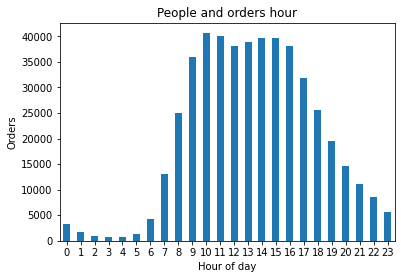

In [58]:
filtered_people.plot(kind='bar', 
                     rot=1,
                     title = 'People and orders hour',
                     xlabel= 'Hour of day',
                     ylabel= 'Orders')

Escribe aquí tus conclusiones
' Las mayor cantidad de pedidos de compras las realizan las 10:00 am 
  y la menor cantidad de pedidos es a las 4:00 am

### [A3] ¿Qué día de la semana compran víveres las personas?

In [59]:
filtered_day = instacart_orders['order_dow'].value_counts(ascending=False).sort_index()

<AxesSubplot:title={'center':'People and orders dow'}, xlabel='Day', ylabel='Orders'>

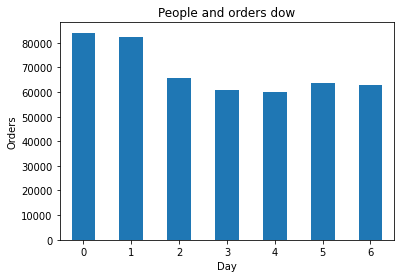

In [60]:
filtered_day.plot(kind='bar', 
                     rot=1,
                     title = 'People and orders dow',
                     xlabel= 'Day',
                     ylabel= 'Orders')

Escribe aquí tus conclusiones
La mayor cantidad de ventas y de pedidos son el dia Domingo que es equivalente a 0

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [61]:
#instacart_orders['days_since_prior_order'].value_counts()

days_since_min = instacart_orders['days_since_prior_order'].min() # Encontramos el valor 0
days_since_max = instacart_orders['days_since_prior_order'].max() # Encontramos el valor 30

print(days_since_min, "y", days_since_max)

0.0 y 30.0


In [62]:
filtered_prior_order = instacart_orders['days_since_prior_order'].value_counts(ascending=False).sort_index()

<AxesSubplot:title={'center':'Reordered time'}, xlabel='Days', ylabel='Orders'>

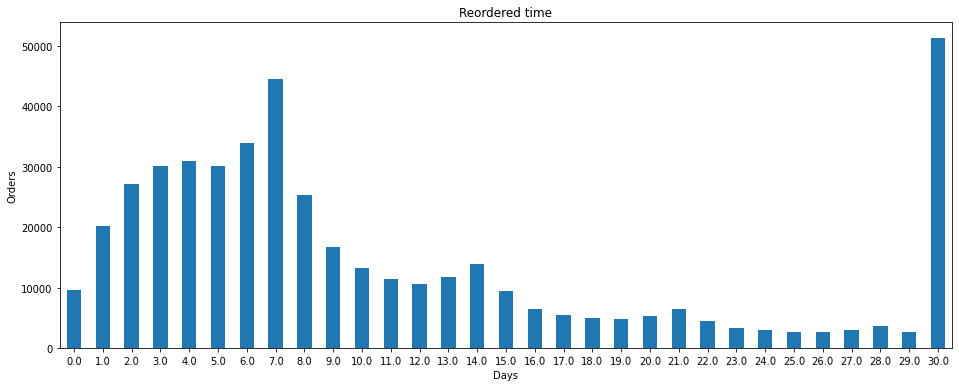

In [63]:
filtered_prior_order.plot(kind='bar', 
                     rot=1,
                     title = 'Reordered time',
                     xlabel= 'Days',
                     ylabel= 'Orders',
                     figsize= [16, 6])

Escribe aquí tus 
1. identificamos que el minimo de pedidos 9589 se realizan en una espera 0 dias para volver a comprar 
   identificamos que el maximo de 51337 pedidos en una espera de 30 dias para volver a comprar

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [64]:
filtered_hours = instacart_orders[(instacart_orders['order_dow']== 3) | (instacart_orders['order_dow']== 6)]

<AxesSubplot:title={'center':'Wednesday VS Saturday'}, xlabel='Hour', ylabel='Orders'>

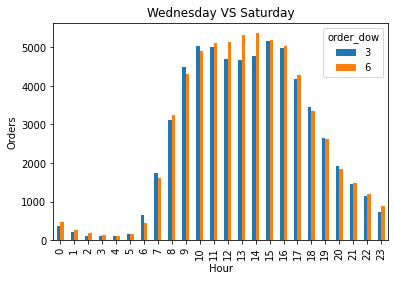

In [65]:
filtered_hours.pivot_table(index= 'order_hour_of_day',
                          columns= 'order_dow',
                          values= 'order_id', 
                          aggfunc= 'count').plot(kind='bar', 
                                                 title= 'Wednesday VS Saturday',
                                                 xlabel= 'Hour',
                                                 ylabel= 'Orders')

'Escribe aquí tus comentaarios
'El sabado es el dia que se realizan mas compras.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [66]:
order_numer_client = instacart_orders.groupby("user_id")["order_number"].count()

In [67]:
order_client = order_numer_client[order_numer_client <20]

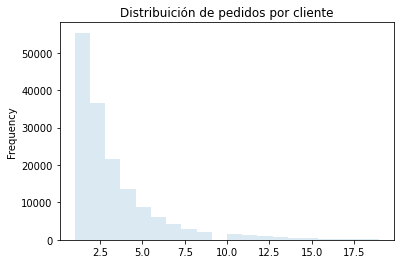

In [68]:
order_client.plot(kind= 'hist', 
                  x= 'order_number',
                  y= 'user_id',
                  title= 'Distribuición de pedidos por cliente',
                  xlabel= 'Number order',
                  ylabel= 'Clients',
                  alpha= 0.16,
                  bins= 20)                  
plt.show()

Escribe aquí tus conclusiones
La distribución de pedidos por cliente señala que los es menor el grupo de clientes realizan grandes compras 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [69]:
products_merge = products.merge(order_products, on= 'product_id', how= 'outer')

In [70]:
filtered_product = products_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)

In [71]:
print(filtered_product.head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
Identificamos que el producto mas vendido entre los 20 primeros es la banana 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [72]:
order_total = order_products.groupby(['order_id'])['product_id'].count().value_counts()

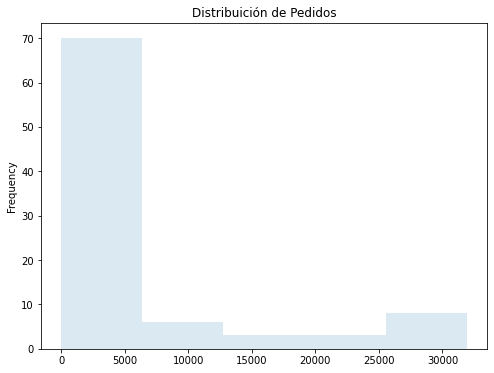

In [73]:
order_total.plot(kind= 'hist', 
                       x= 'product_id',
                       y= 'order_id',
                       title= 'Distribuición de Pedidos',
                       xlabel= 'Numero de productos',
                       ylabel= 'Total de pedidos',
                       alpha= 0.16,
                       bins= 5,
                       figsize= [8,6])                  
   
plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [74]:
reordered_merge = products_merge[products_merge['reordered']==1]

In [75]:
reordered_filtered = reordered_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)

In [76]:
print(reordered_filtered.head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
el principal articulo que vuelve a pedirse con mayor frecuencia es banana 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [77]:
reordered_order_products_names = pd.merge(
    order_products,
    products,
    on="product_id",
    how="left"
)

reordered_order_products_names.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()

,product_id,product_name,reordered
0,1,Chocolate Sandwich Cookies,0.564286
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
4,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [78]:
reordered_order = pd.merge(
    order_products,
    instacart_orders,
    on="order_id",
    how="left"
)

reordered_order.groupby(['user_id'])['reordered'].mean().reset_index()

,user_id,reordered
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


Escribe aquí tus conclusiones
'# trabajando en ello 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [79]:
add_to_cart_merge = products_merge[products_merge['add_to_cart_order']==1]

In [80]:
add_to_cart_filtered = add_to_cart_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)

In [81]:
print(add_to_cart_filtered.head(20))

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

### Conclusion general del proyecto:

En la primera parte debemos leer los datos e importar las librerias, limpiar los datos implicitos y explicitos.
debemos identificar los datos ausentes, reemplazarlo. Encontrar datos duplicados, eliminarlos y reiniciar el data set.

En la segunda parte debemos realizar agrupaciones, aplicar filtros a columnas especificas, utilizar funciones para analizar de manera eficiente y orderar por alfabeto.
    
En la tercera parte debemos analizar los datos y crear graficos e histogramas para tener herramientas visuales para explicar nuestro analisis a otros grupos de personas de manera que sean de rapido entendimiento. 